# Visual Data Stories with Snowflake Notebooks

In this tutorial, we will walk you through the different ways you can enrich your data narrative through engaging visuals in Snowflake Notebooks. We will demonstrate how you can develop visualizations, work with Markdown text, embed images, and build awesome data apps all within your notebook, alongside your code and data.

**Requirements:** Please add the `matplotlib` and `plotly` package from the package picker on the top right. We will be using these packages in the notebook.

In [1]:
# Import python packages
import streamlit as st
import pandas as pd

## Data visualizations 📊

With Snowflake Notebook, you can use your favorite Python visualization library, including matplotlib and plotly, to develop your visualization.

First, let's generate some toy data for the Iris dataset.

In [2]:
# Sample data
species = ["setosa"] * 3 + ["versicolor"] * 3 + ["virginica"] * 3
measurements = ["sepal_length", "sepal_width", "petal_length"] * 3
values = [5.1, 3.5, 1.4, 6.2, 2.9, 4.3, 7.3, 3.0, 6.3]
df = pd.DataFrame({"species": species,"measurement": measurements,"value": values})
df

species   measurement  value
0      setosa  sepal_length    5.1
1      setosa   sepal_width    3.5
2      setosa  petal_length    1.4
3  versicolor  sepal_length    6.2
4  versicolor   sepal_width    2.9
5  versicolor  petal_length    4.3
6   virginica  sepal_length    7.3
7   virginica   sepal_width    3.0
8   virginica  petal_length    6.3

## Plotting with Altair

Now let's plot a bar chart in Altair. You can learn more about Altair [here](https://altair-viz.github.io/).

In [3]:
import altair as alt
alt.Chart(df).mark_bar().encode(
    x= alt.X("measurement", axis = alt.Axis(labelAngle=0)),
    y="value",
    color="species"
).properties(
    width=700,
    height=500
)

/Users/dolee/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/dolee/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## Plotting with Matplotlib

Let's do the same with matplotlib. Note how convenient it is to do `df.plot` with your dataframe with pandas. This uses matplotlib underneath the hood to generate the plots. You can learn more about pandas's [pd.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) and about matplotlib [here](https://matplotlib.org/).

First, let's pivot our data so that our data is stacked.

In [4]:
pivot_df = pd.pivot_table(data=df, index=['measurement'], columns=['species'], values='value')

We build a quick Streamlit app to visualize the pivot operation. (Don't worry we will discuss what the `st.` Streamlit  commands mean later in the tutorial!)

In [5]:
col1, col2 = st.columns(2)
with col1: 
    st.markdown("Old Dataframe")
    st.dataframe(df)    
with col2:
    st.markdown("Pivoted Dataframe")
    st.dataframe(pivot_df)

2024-07-31 17:26:30.086 
  command:

    streamlit run /Users/dolee/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


Now let's use matplotlib to plot the stacked bar chart.

In [12]:
import matplotlib.pyplot as plt
ax = pivot_df.plot.bar(stacked=True)
ax.set_xticklabels(list(pivot_df.index), rotation=0)
ax.

matplotlib.axes._axes.Axes

## Plotting with Plotly

Finally, let's do the same plot with plotly. Learn more about plotly [here](https://plotly.com/python/plotly-express/).

/Users/dolee/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


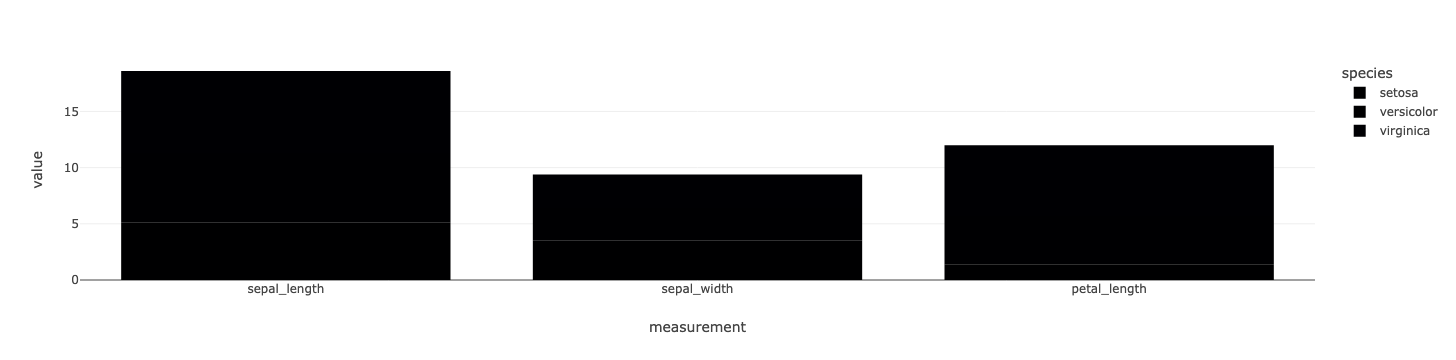

In [7]:
import plotly.express as px
px.bar(df, x='measurement', y='value', color='species')
px.

## Develop your narrative with Markdown cells

With Snowflake Notebooks, you can leverage Markdown language to develop rich text displays with formatting. 

You can change a cell type to render Markdown by clicking on the dropdown on the top left to select `Markdown` (or use `m` as the hotkey to convert a cell type to Markdown).

# Top-level Header 
Markdown: `# Top-level Header`

## 2nd-level Header 
Markdown: `## 2nd-level Header`

### 3rd-level Header 
Markdown: `### 3rd-level Header`

### Inline Text Formatting

Here is some *italicized text* and **bolded text**. 

Markdown: `Here is some *italicized text* and **bolded text**.`

Here is a link to the [Snowflake website](https://snowflake.com/)

Markdown: `Here is a link to the [Snowflake website](https://snowflake.com/)`

From here on, you can double click onto each Markdown cell to take a look at the underlying Markdown content.

Here is a bulleted list (with emojis 😊)

- ❄️
- ❄️❄️
- ❄️❄️❄️
    - Nested ❄️
    - Nested ❄️❄️

## Formatting code

Python: 
```python
import pandas as pd
df = pd.DataFrame([1,2,3])
```

SQL: 
```sql
SELECT * FROM MYTABLE
```

Inline Code formatting: 

My data is stored in `DB.SCHEMA`. 

## Embedding Images 🖼️


You can use the Markdown Syntax to embed images in your notebook.
```
![](https://www.snowflake.com/wp-content/themes/snowflake/assets/img/brand-guidelines/logo-sno-blue-example.svg)
```
![](https://www.snowflake.com/wp-content/themes/snowflake/assets/img/brand-guidelines/logo-sno-blue-example.svg)


It even works with a GIF animation!

```
![](https://upload.wikimedia.org/wikipedia/commons/2/2c/Rotating_earth_%28large%29.gif)
```
![](https://upload.wikimedia.org/wikipedia/commons/2/2c/Rotating_earth_%28large%29.gif)

## Bring your Notebook alive with Streamlit

You can bring your data narrative alive in notebooks and make it even more interactive by using Streamlit.

[Streamlit](https://streamlit.io/) is an open-source framework for building interactive data apps in Python (not a single line of HTML or Javascript required!)

Unlike in other notebooks where you need to navigate to a separate terminal window to serve up your Streamlit app, you can test and develop your Streamlit app directly in your notebook. 

We saw how you can embed images using Markdown. Here we show how you can embed images in your notebook using Streamlit which gives you more image customization options.

In [ ]:
import streamlit as st
st.image("https://www.snowflake.com/wp-content/themes/snowflake/assets/img/brand-guidelines/logo-sno-blue-example.svg",width=500)

In [ ]:
# Also works with a GIF animation!
st.image("https://upload.wikimedia.org/wikipedia/commons/2/2c/Rotating_earth_%28large%29.gif", caption="Rotating Earth!")

Let's say you have some images in your Snowflake stage, you can stream in the image file and display it with Streamlit.

In [ ]:
LS @IMAGE_STAGE;

In [ ]:
from snowflake.snowpark.context import get_active_session
session = get_active_session()
image=session.file.get_stream("@IMAGE_STAGE/snowflake-logo.png", decompress=False).read() 
st.image(image)

## Interactive data apps 🕹️

Think of each cell in your Snowflake Notebook as a mini Streamlit app. As you interact with your data app, the relevant cells will get re-executed and the results in your app updates.


In [ ]:
st.markdown("""# Interactive Filtering with Streamlit! :balloon: 
Values will automatically cascade down the notebook cells""")
value = st.slider("Move the slider to change the filter value 👇", df.value.min(), df.value.max(), df.value.mean(), step = 0.3 )

In [ ]:
# Filter the table from above using the Streamlit slider
df[df["value"]>value].sort_values("value")

In [ ]:
alt.Chart(df).mark_bar().encode(
    x= alt.X("measurement", axis = alt.Axis(labelAngle=0)),
    y="value",
    color="species"
).properties(width=500,height=300)

# Now it's your turn! 🙌 

Try out Notebooks yourself to build your own data narrative!